In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images[0]

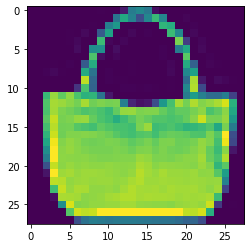

'Bag'

In [ ]:
i=100
plt.figure()
plt.imshow(train_images[i])
plt.show()
class_names[train_labels[i]]

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

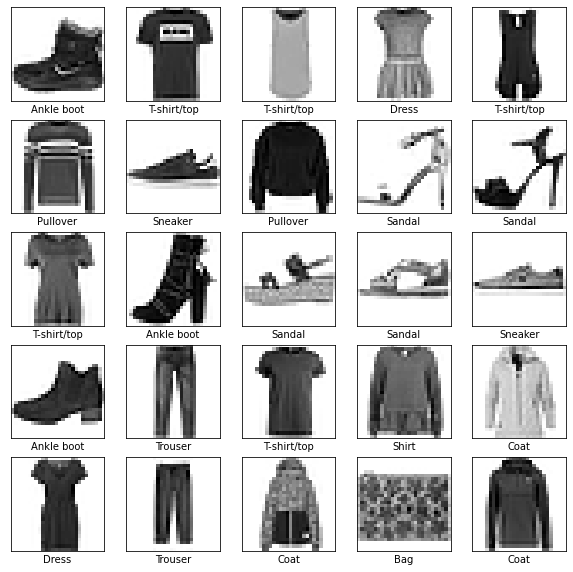

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#728
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

predict (x)
eval(x_tes , y_test)

NameError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6844 - accuracy: 0.7723
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4620 - accuracy: 0.8385
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4164 - accuracy: 0.8532
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3865 - accuracy: 0.8625
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3666 - accuracy: 0.8698
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3490 - accuracy: 0.8760
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3344 - accuracy: 0.8792
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3218 - accuracy: 0.8838
Epoch 9/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3097 - accuracy: 0.8875
Epoch 10/10
60

In [ ]:
model.predict_classes(test_images)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.8699


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.4269597e-05, 5.5888759e-06, 2.7022159e-05, 4.9120604e-06,
       6.7538517e-06, 5.9132505e-02, 3.4995894e-05, 5.6442659e-02,
       2.2981169e-03, 8.8203317e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                    100*np.max(predictions_array),
                    class_names[true_label]),
                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

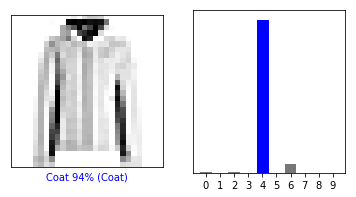

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

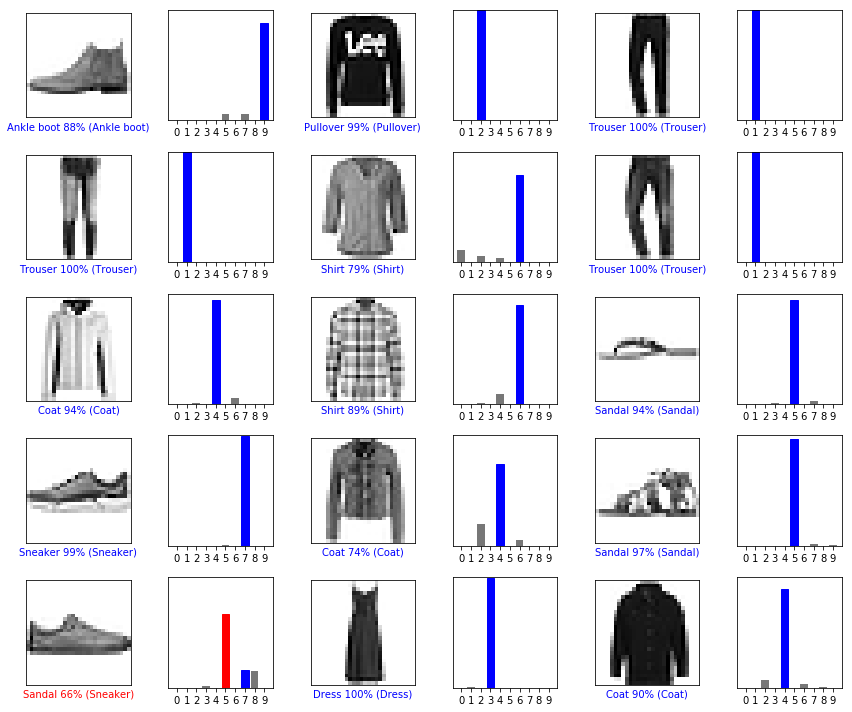

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()